In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers.experimental import preprocessing
from keras.utils.vis_utils import plot_model

In [ ]:
dt = pd.read_csv('https://raw.githubusercontent.com/adhipramanax/Regresi-Linear-Penjualan-IceCream/main/IceCream.csv')

In [ ]:
dt.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


<function matplotlib.pyplot.show>

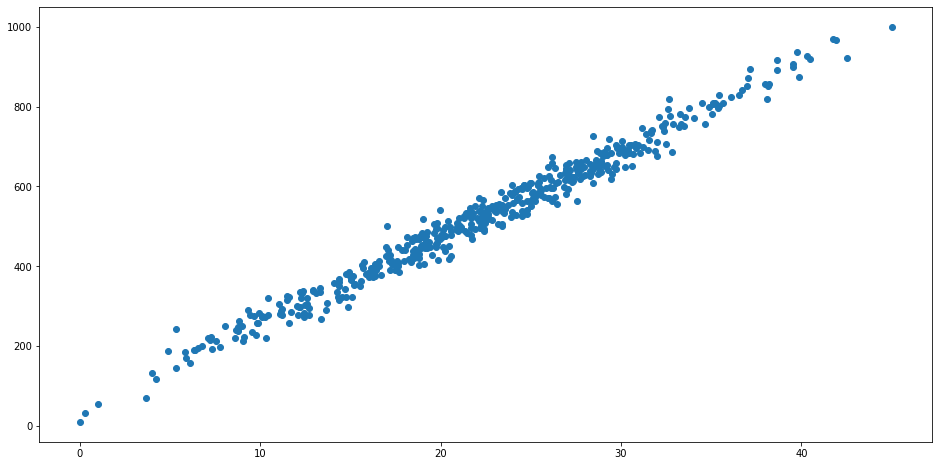

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter(dt['Temperature'], dt['Revenue'])
plt.show

In [ ]:
normalize = preprocessing.Normalization(axis=None, input_shape=[1,])
normalize.adapt(np.array(dt['Temperature']))

In [ ]:
model = Sequential([
  normalize,
  layers.Dense(64, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
model.predict(dt['Temperature'][:5])

array([[0.03465626],
       [0.05600683],
       [0.0825092 ],
       [0.02270992],
       [0.14884835]], dtype=float32)

In [ ]:
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [ ]:
history = model.fit(dt['Temperature'], dt['Revenue'], epochs=500, validation_split=0.2)

Epoch 1/500
13/13 [==============================] - 1s 14ms/step - loss: 513.7810 - val_loss: 551.1680
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 513.3346 - val_loss: 550.6323
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 512.7110 - val_loss: 549.8002
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 511.7129 - val_loss: 548.5154
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 510.1972 - val_loss: 546.5389
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 507.9402 - val_loss: 543.7291
Epoch 7/500
13/13 [==============================] - 0s 4ms/step - loss: 504.6873 - val_loss: 539.7982
Epoch 8/500
13/13 [==============================] - 0s 5ms/step - loss: 500.1913 - val_loss: 534.4545
Epoch 9/500
13/13 [==============================] - 0s 3ms/step - loss: 494.2014 - val_loss: 527.4345
Epoch 10/500
13/13 [==============================] - 0s 3ms/step - loss

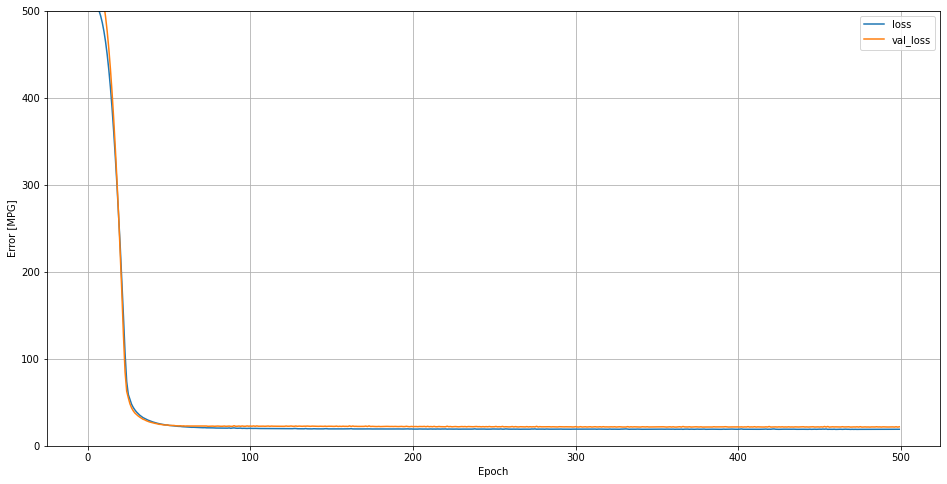

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(16, 8))
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 500])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
495,18.949888,21.725327,495
496,18.920883,21.555653,496
497,18.915909,21.890696,497
498,19.015800,21.519724,498
499,19.020893,21.834257,499


In [ ]:
x = tf.linspace(0.0, 50, 51)
y = model.predict(x)

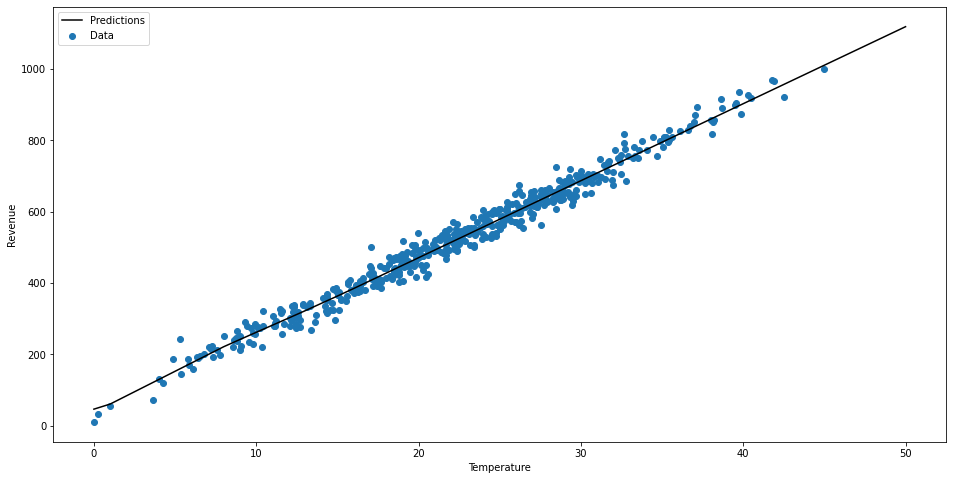

In [ ]:
def plot_show(x, y):
  plt.figure(figsize=(16, 8))
  plt.scatter(dt['Temperature'], dt['Revenue'], label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Temperature')
  plt.ylabel('Revenue')
  plt.legend()

plot_show(x, y)